## Find the classes

First, we set up the hypothesis test. Let

\begin{align*}
   H_0:& f_X(x) = f_o(x) \\
   H_1:& f_X(x) \neq f_o(x)
\end{align*}

where $X \sim N(157, 13.7^2)$ denotes the total cholesterol values for individuals. Then, we know

$$\frac{X - 157}{31.7} \sim Z $$

where $Z$ is the standard normal variable. To figure out the first class, we essentially need to find a z-score $z_1$ such that 

$$ P(Z \leq z_1) = 1/6$$

We could just observe the table and eyeball the value, but Python provides a function to approximate it:

In [4]:
from scipy.stats import norm

norm.ppf(1/6)

-0.96742156610170105

This means that 

$$P(\frac{X - 157}{31.7} = Z \leq -0.967) = 1/6$$

Then, we could find the threshold of the first class. Namely, the lower threshold should be $-\infty$ and the upper threshold should be $ (-0.9674)(31.7) + 157 = 126.33$. Similarly, we could find the threshold for other classes.

In [5]:
thresholds = [
    norm.ppf(0, loc=157, scale=31.7),
    norm.ppf(1/6, loc=157, scale=31.7),
    norm.ppf(2/6, loc=157, scale=31.7),
    norm.ppf(3/6, loc=157, scale=31.7),
    norm.ppf(4/6, loc=157, scale=31.7),
    norm.ppf(5/6, loc=157, scale=31.7),
    norm.ppf(6/6, loc=157, scale=31.7),
]

print(thresholds)

[-inf, 126.33273635457607, 143.34594461233399, 157.0, 170.65405538766601, 187.66726364542393, inf]


Therefore, the classes should be 


\begin{align*}
   &r_1 = (-\infty, 126.33] && r_2 = (126.33, 143.34]  \\
   &r_3 = (143.34, 157.0] && r_4 = (157.0, 170.65] \\
   &r_5 = (170.65, 187.66] && r_6 = (187.66, \infty)
\end{align*}


## Build a table

In [6]:
# Find the observed frequency
import numpy

data = [
    95, 129, 136, 143, 152, 165, 175, 197,
    108, 129, 139, 144, 152, 166, 180, 204,
    108, 131, 140, 144, 155, 171, 181, 220,
    114, 131, 142, 145, 158, 172, 189, 223,
    115, 135, 142, 146, 158, 173, 192, 226,
    124, 136, 143, 148, 162, 174, 194, 230
]

counts, bins = numpy.histogram(data, bins=thresholds)
counts

array([ 6, 13,  8,  5,  7,  9], dtype=int64)

In [7]:
# Build a table
import pandas as pd

df = pd.DataFrame(
    index = ['r1', 'r2', 'r3', 'r4', 'r5', 'r6'],
    data={
        'Obs.Freq.': counts,
        'Prob.': [1/6] * 6,
        'Exp.Freq.': [1/6*48] * 6
    }
)
df[['Obs.Freq.', 'Prob.', 'Exp.Freq.']]

,Obs.Freq.,Prob.,Exp.Freq.
r1,6,0.166667,8.0
r2,13,0.166667,8.0
r3,8,0.166667,8.0
r4,5,0.166667,8.0
r5,7,0.166667,8.0
r6,9,0.166667,8.0


## Calculate the test statistic

The test statistic is 

$$ D = \sum_{i=1}^{6} = \frac{(X_i - np_i)^2}{np_i} \sim X^{2}_{6-1} $$

Now calculate it:

In [8]:
d = 0

for index, row in df.iterrows():
    d += ((row['Obs.Freq.'] - row['Exp.Freq.']) ** 2) / row['Exp.Freq.']
    
d

5.0

Suppose the level of significance $\alpha = 0.05$, then since

$$ X^{2}_{0.90,5} = 9.236 \geq 5 = d $$

We don't have enough evidence to reject the null hypothesis. Given the histagram of the data, we find this conclusion to be reasonable.

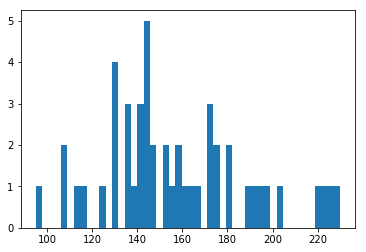

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

counts, bins, graph = plt.hist(data, bins=48)